In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cassava-leaf-disease-classification/sample_submission.csv
/kaggle/input/cassava-leaf-disease-classification/label_num_to_disease_map.json
/kaggle/input/cassava-leaf-disease-classification/train.csv
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train14-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train13-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train04-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train01-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train08-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train00-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train10-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train02-1338.tfrec
/kaggle/input/cassava-leaf-disease-classification/train_tfrecords/ld_train15-1327.tf

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, Dense, MaxPooling2D, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelBinarizer 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from tensorflow.keras.layers import Dropout, Dense, Input
# ignoring warnings
import warnings
warnings.simplefilter("ignore")

import os, cv2, json
from PIL import Image

In [4]:
BASE_DIR = '../input/cassava-leaf-disease-classification'


In [5]:
df = pd.read_csv(os.path.join(BASE_DIR, "train.csv"))


In [6]:
df.head(5)

image_id  label
0  1000015157.jpg      0
1  1000201771.jpg      3
2   100042118.jpg      1
3  1000723321.jpg      1
4  1000812911.jpg      3

In [7]:
df['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [8]:
df['label'].value_counts()

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64

In [9]:
BATCH_SIZE = 32
EPOCHS = 25
TARGET_SIZE = 224

## Samples of Cassava Bacterial Blight (0)

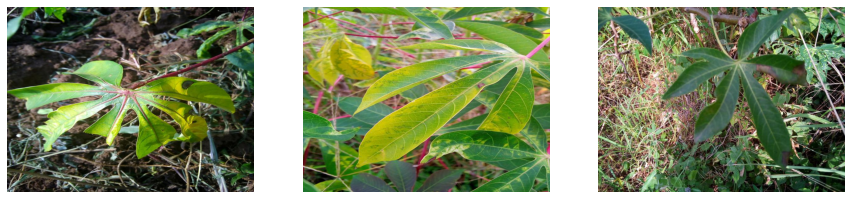

In [10]:
sample = df[df.label == 0].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

## Samples of Cassava Brown Streak Disease (1)


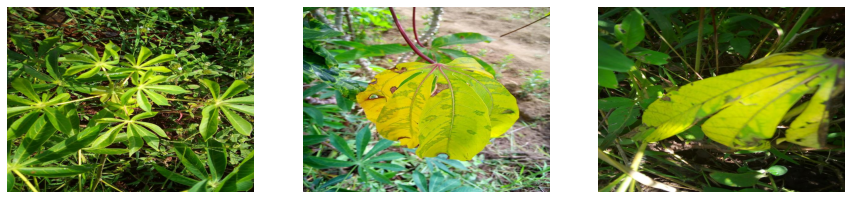

In [11]:
sample = df[df.label == 1].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

## Samples of Cassava Green Mottle  (2)


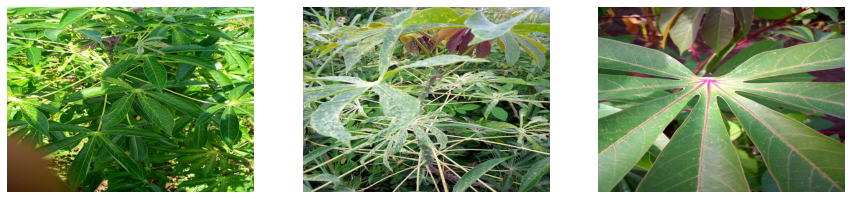

In [12]:
sample = df[df.label == 2].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

## Samples of Cassava Mosaic Disease  (3)

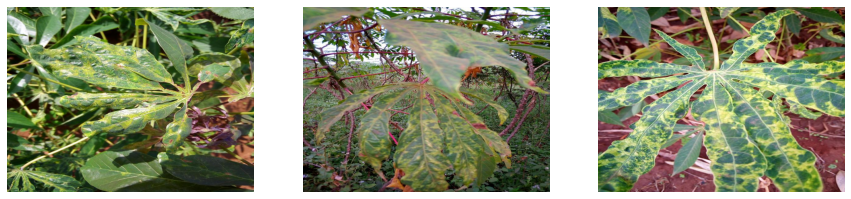

In [13]:
sample = df[df.label == 3].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

## Samples of Healthy (4)


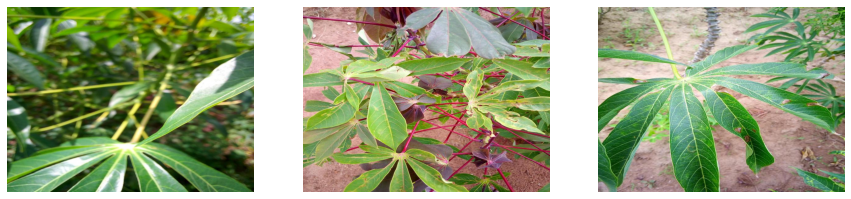

In [14]:
sample = df[df.label == 4].sample(3)
plt.figure(figsize=(15, 5))
for ind, (image_id, label) in enumerate(zip(sample.image_id, sample.label)):
    plt.subplot(1, 3, ind + 1)
    img = cv2.imread(os.path.join(BASE_DIR, "train_images", image_id))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    
plt.show()

In [15]:
df.label = df.label.astype('str')

train_datagen = ImageDataGenerator(featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   validation_split = 0.25,
                                   rotation_range = 15,
                                   zoom_range = 0.25,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   height_shift_range = 0.1,
                                   width_shift_range = 0.1,
#                                    rescale=1./255
                                  )


train_generator = train_datagen.flow_from_dataframe(df,
                         directory = os.path.join(BASE_DIR, "train_images"),
                         subset = "training",
                         x_col = "image_id",
                         y_col = "label",
                         target_size = (TARGET_SIZE, TARGET_SIZE),
                         batch_size = BATCH_SIZE,
                         class_mode = 'categorical')

validation_datagen = ImageDataGenerator(validation_split = 0.25)

validation_generator = validation_datagen.flow_from_dataframe(df,
                         directory = os.path.join(BASE_DIR, "train_images"),
                         subset = "validation",
                         x_col = "image_id",
                         y_col = "label",
                         target_size = (TARGET_SIZE, TARGET_SIZE),
                         batch_size = BATCH_SIZE,
                         class_mode = 'categorical')

Found 16048 validated image filenames belonging to 5 classes.
Found 5349 validated image filenames belonging to 5 classes.


In [16]:
# label_binrizer = LabelBinarizer()
# df['label'] = label_binrizer.fit_transform(df['label'])

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


In [18]:
elst=callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
save_ck=callbacks.ModelCheckpoint(".model_wt.hdf5",save_best_only=True,monitor='val_loss',mode='min')

In [19]:
base_model =tf.keras.applications.efficientnet.EfficientNetB2(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)
model=tf.keras.models.Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))

model.add(Dense(5,activation='softmax'))

2022-08-23 09:52:47.537022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 09:52:47.653378: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 09:52:47.654391: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 09:52:47.655630: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

31801344/31790344 [==============================] - 0s 0us/step


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 7, 7, 1408)        7768569   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 7045      
Total params: 7,775,614
Trainable params: 7,708,039
Non-trainable params: 67,575
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
tf.keras.metrics.CategoricalAccuracy(
    name='categorical_accuracy', dtype=None
)])


model.fit(train_generator, epochs = 5, validation_data = validation_generator,callbacks=[save_ck,elst])

2022-08-23 09:52:55.089680: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-08-23 09:53:08.370240: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


502/502 [==============================] - 541s 1s/step - loss: 0.6689 - precision: 0.8373 - recall: 0.6897 - categorical_accuracy: 0.7607 - val_loss: 0.6659 - val_precision: 0.8208 - val_recall: 0.7500 - val_categorical_accuracy: 0.7891
Epoch 2/5
502/502 [==============================] - 402s 801ms/step - loss: 0.5293 - precision: 0.8631 - recall: 0.7615 - categorical_accuracy: 0.8121 - val_loss: 0.5739 - val_precision: 0.8356 - val_recall: 0.7443 - val_categorical_accuracy: 0.7917
Epoch 3/5
502/502 [==============================] - 414s 825ms/step - loss: 0.4774 - precision: 0.8739 - recall: 0.7905 - categorical_accuracy: 0.8303 - val_loss: 0.4953 - val_precision: 0.8801 - val_recall: 0.7908 - val_categorical_accuracy: 0.8372
Epoch 4/5
502/502 [==============================] - 407s 811ms/step - loss: 0.4523 - precision: 0.8791 - recall: 0.8057 - categorical_accuracy: 0.8403 - val_loss: 0.5058 - val_precision: 0.8504 - val_recall: 0.8119 - val_categorical_accuracy: 0.8289
Epoch 5/5

In [22]:
tf.keras.models.save_model(model,'model_cassava.hdf5')



In [23]:
from IPython.display import FileLinks
FileLinks('.') # input argument is specified folder

./
  __notebook__.ipynb
  model_cassava.hdf5
  .model_wt.hdf5